<a href="https://colab.research.google.com/github/Novice1414/Final_Year_Project/blob/main/PIMA_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

In [90]:
diabetes_df = diabetes_df.rename(columns={'Outcome': 'DO'})

In [91]:
diabetes_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DO
0,6,148,72,35,,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [92]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
DO                          0
dtype: int64

In [93]:
diabetes_df.replace(' ', np.nan, inplace=True)  # Replace empty strings with NaN
diabetes_df = diabetes_df.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, converting non-convertible values to NaN
diabetes_df.fillna(diabetes_df.mean(), inplace=True)  # Replace NaN values with the mean of the column


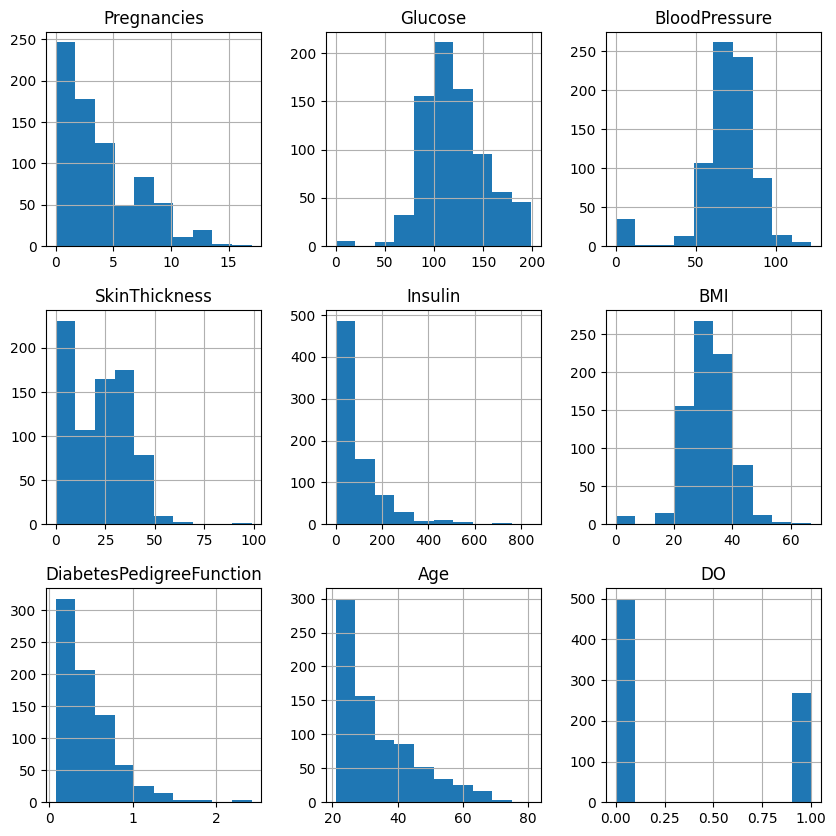

In [94]:
diabetes_df.hist(figsize=(10, 10))
plt.show()

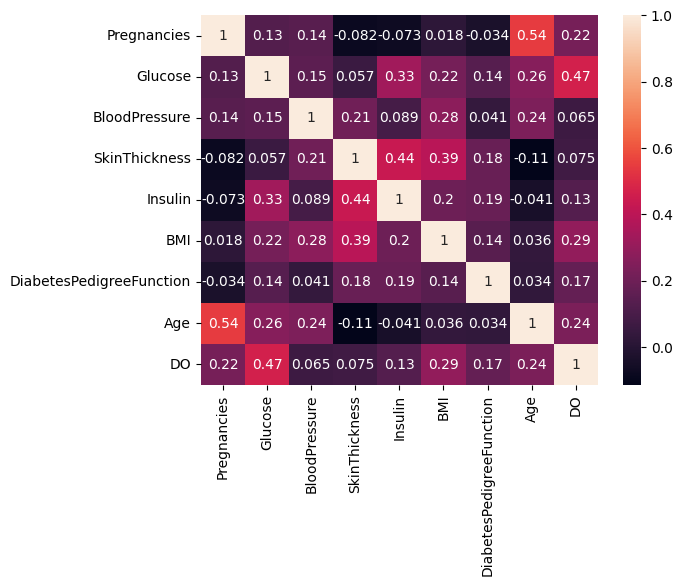

In [95]:
sns.heatmap(diabetes_df.corr(), annot=True)
plt.show()

In [96]:
diabetes_df = diabetes_df.dropna()

** Checking that which columns have higher outliers**

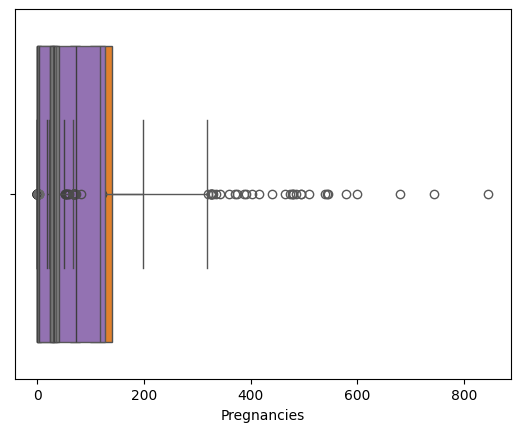

In [97]:
import seaborn as sns

# Create a boxplot for each column
for col in diabetes_df.columns:
    sns.boxplot(x=diabetes_df[col])

**Printing the columns having higher outliers**

In [98]:
# Calculate the interquartile range for each column
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1

# Count the number of outliers for each column
num_outliers = ((diabetes_df < (Q1 - 1.5 * IQR)) | (diabetes_df > (Q3 + 1.5 * IQR))).sum()

In [99]:
# Sort columns by number of outliers
sorted_cols = num_outliers.sort_values(ascending=False)

# Print columns with most outliers
print(sorted_cols.head())

BloodPressure               45
Insulin                     34
DiabetesPedigreeFunction    29
BMI                         19
Age                          9
dtype: int64


**Removing the outliers**

In [100]:
import numpy as np

# Calculate IQR for each column
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Determine which values are outliers
outliers = ((diabetes_df < (Q1 - threshold * IQR)) | (diabetes_df > (Q3 + threshold * IQR)))

# Remove rows containing outliers
clean_df = diabetes_df[~outliers.any(axis=1)]

**Splitting the train and test data from the dataset**

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('DO', axis=1)
y = diabetes_df['DO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Feature Scaling**

In [102]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Applying ANN**

In [103]:
import tensorflow as tf


In [104]:
ann = tf.keras.models.Sequential()

**Adding the input layers and hidden layers**

In [105]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))

**Output Layer**

In [106]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [107]:
ann.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

**Training the ANN on training Set**

In [160]:
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=180,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])



Accuracy: 0.9039087891578674


![dnnwithdropout.jpeg](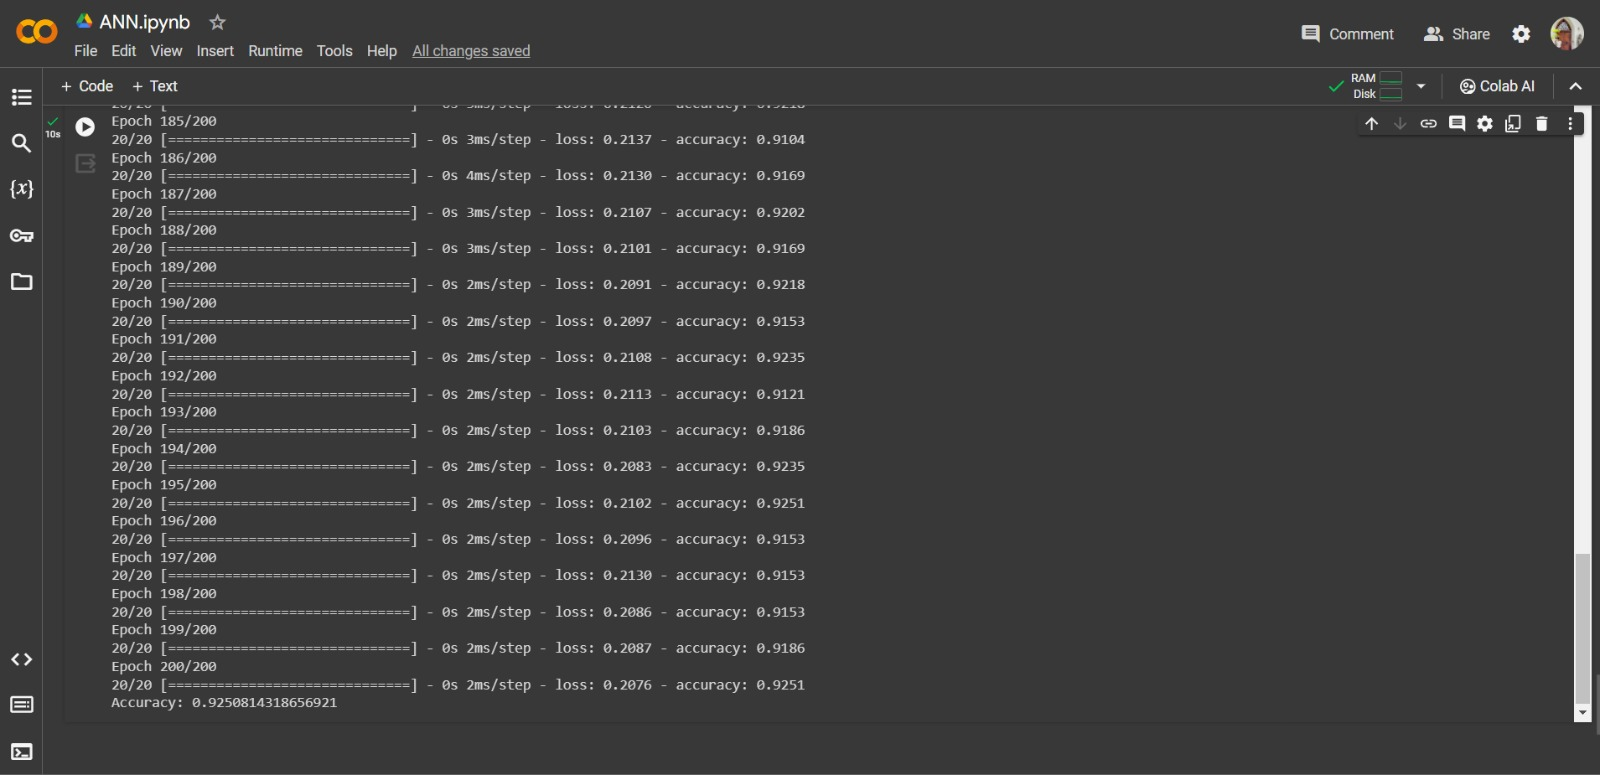![earlystopping.jpeg](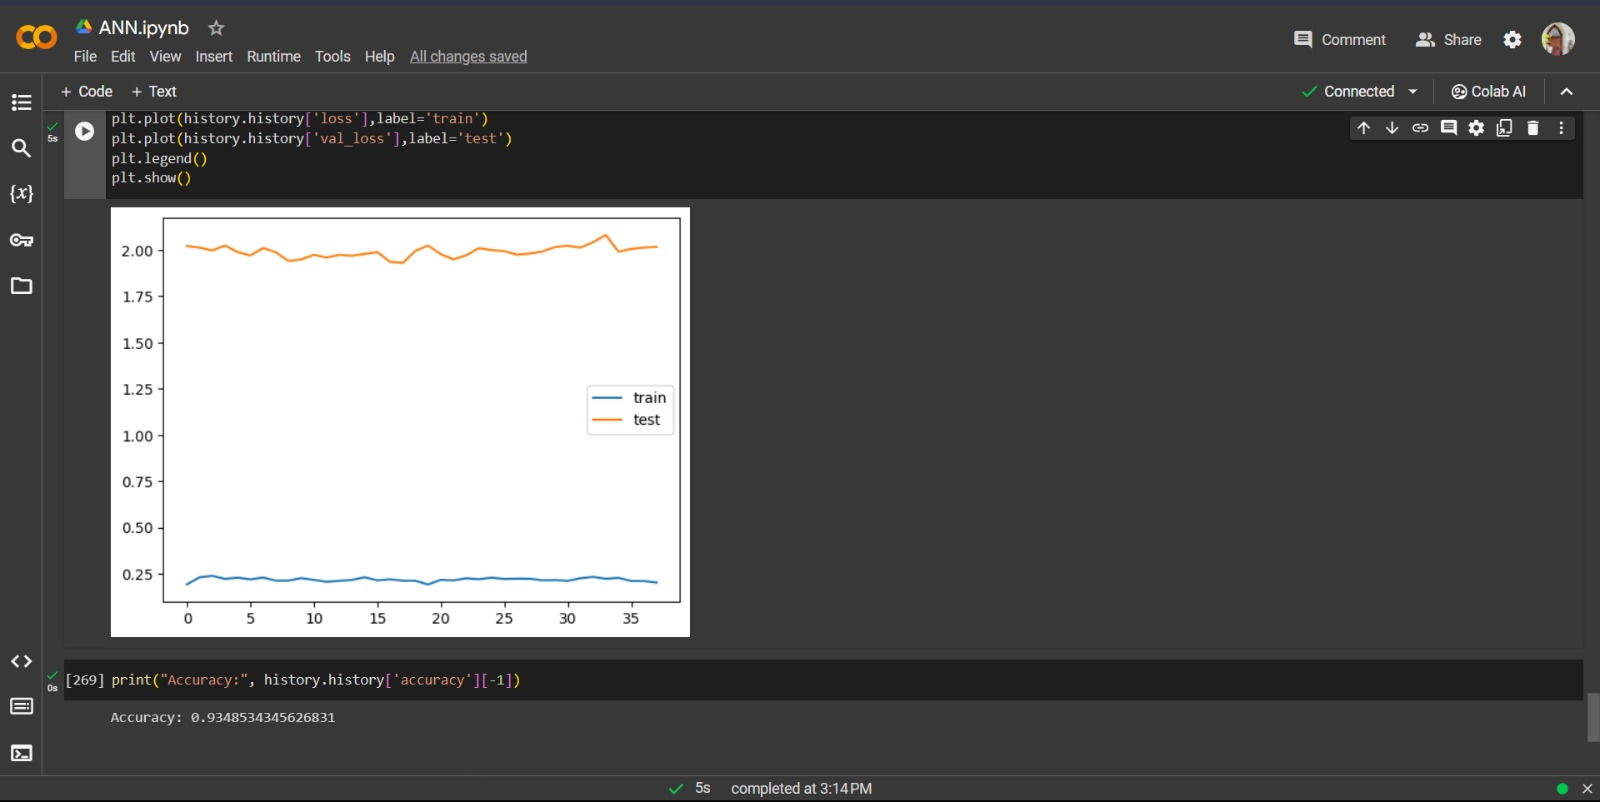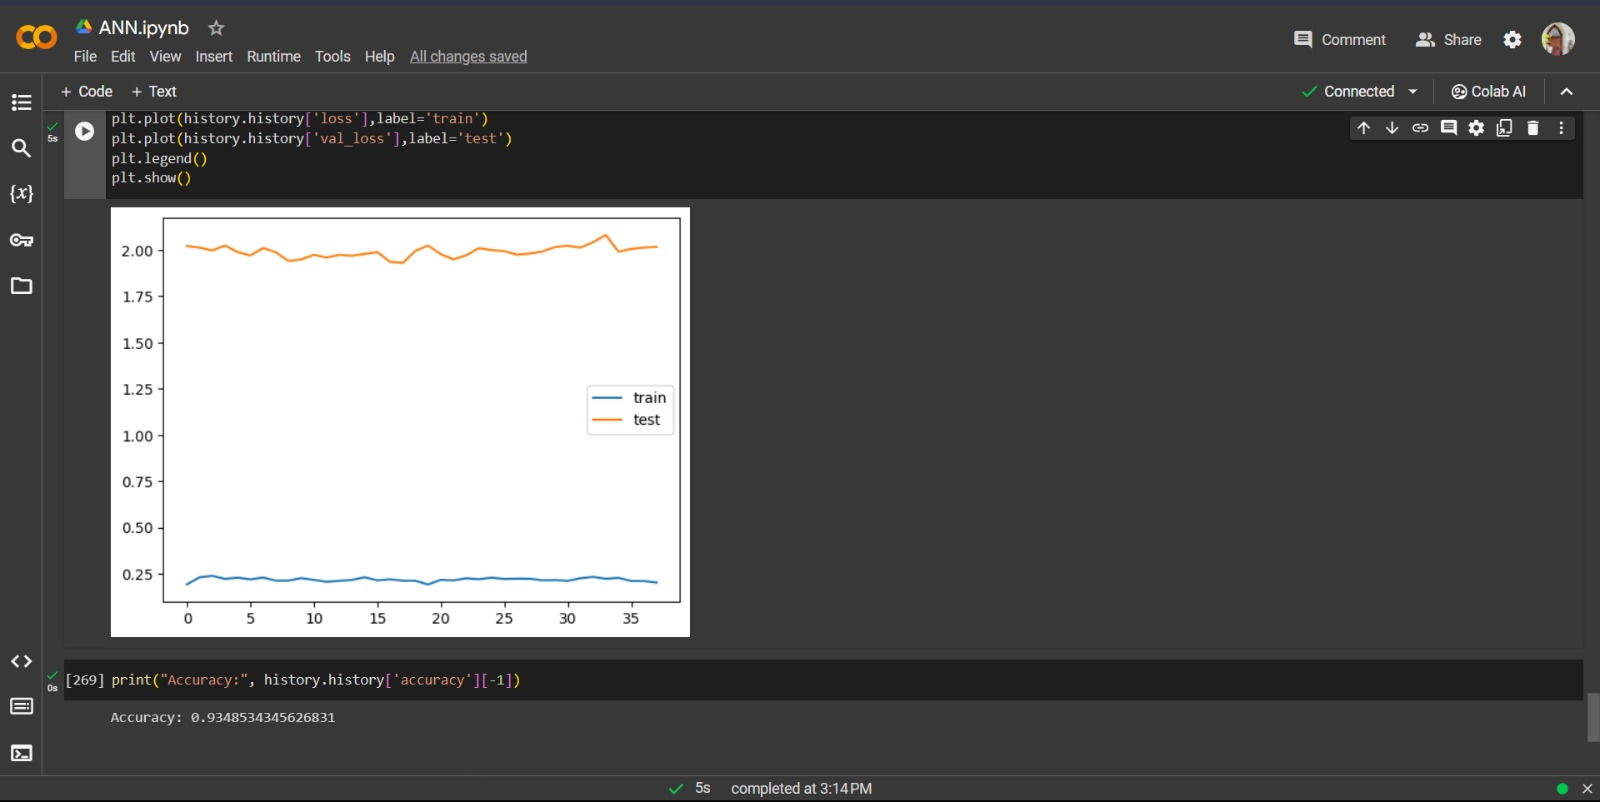))

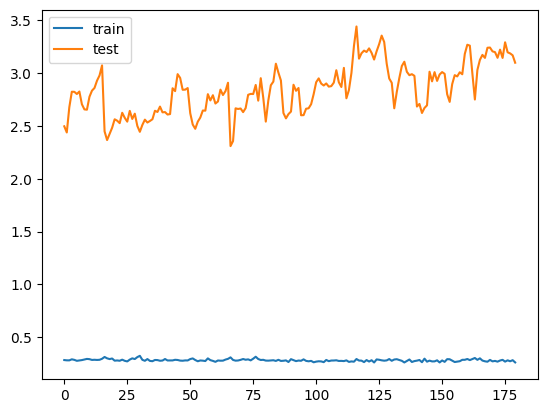

In [161]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

**Hyperparameter Tuning**

Early Stopping

In [211]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.00001,patience=20,verbose=1,mode="auto",baseline=None,restore_best_weights=False)

In [215]:
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=400, callbacks=callback)


Epoch 1/400
20/20 [==============================] - 0s 17ms/step - loss: 0.2783 - accuracy: 0.8958 - val_loss: 3.6834 - val_accuracy: 0.6883
Epoch 2/400
20/20 [==============================] - 0s 14ms/step - loss: 0.2759 - accuracy: 0.8941 - val_loss: 3.8152 - val_accuracy: 0.6948
Epoch 3/400
20/20 [==============================] - 0s 12ms/step - loss: 0.2658 - accuracy: 0.8958 - val_loss: 3.7774 - val_accuracy: 0.6883
Epoch 4/400
20/20 [==============================] - 0s 10ms/step - loss: 0.2607 - accuracy: 0.9072 - val_loss: 3.7714 - val_accuracy: 0.6883
Epoch 5/400
20/20 [==============================] - 0s 11ms/step - loss: 0.2651 - accuracy: 0.9039 - val_loss: 3.8045 - val_accuracy: 0.6883
Epoch 6/400
20/20 [==============================] - 0s 10ms/step - loss: 0.2640 - accuracy: 0.8990 - val_loss: 3.8053 - val_accuracy: 0.6948
Epoch 7/400
20/20 [==============================] - 0s 11ms/step - loss: 0.2677 - accuracy: 0.8974 - val_loss: 3.4377 - val_accuracy: 0.6883
Epoch 

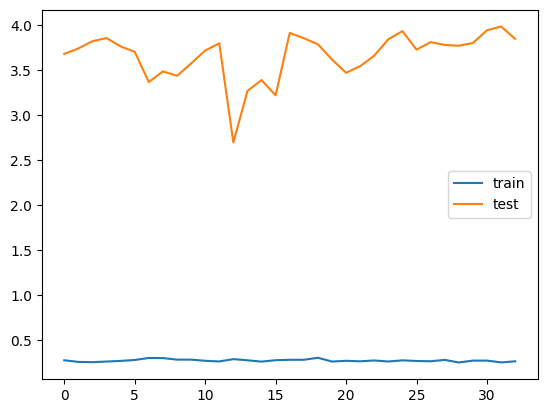

In [206]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [205]:
print("Accuracy:", history.history['accuracy'][-1])

Accuracy: 0.9071661233901978


**Regularization**

L1 regularization

In [139]:
ann2 = tf.keras.models.Sequential()


ann2.add(tf.keras.layers.Dense(units=6,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
ann2.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
ann2.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
#ann2.add(tf.keras.layers.Dropout(0.2))
ann2.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))

In [140]:
ann2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [141]:
ann2.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [142]:
history = ann2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3200,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])

Accuracy: 0.8664495348930359


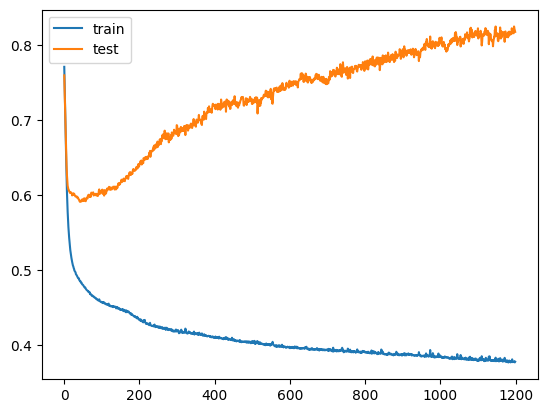

In [143]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

L2 Regularization

In [216]:
ann3 = tf.keras.models.Sequential()


ann3.add(tf.keras.layers.Dense(units=6,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ann3.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ann3.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
#ann2.add(tf.keras.layers.Dropout(0.2))
ann3.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))

In [217]:
ann3.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [218]:
ann3.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [225]:
history = ann3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=3200,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])

Accuracy: 0.9299674034118652


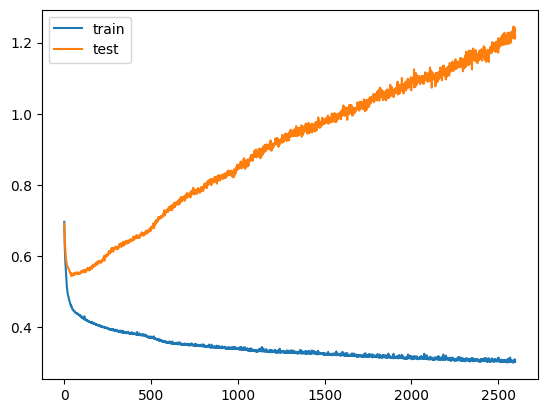

In [148]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

**Performance Matrix**

In [122]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [123]:
y_pred = ann3.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 3ms/step


In [124]:
y_test_classes = y_test.values.astype(int)

Confusion Matrix

In [125]:
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[43 56]
 [37 18]]


In [126]:
# Precision
precision = precision_score(y_test_classes, y_pred_classes)
print("Precision:", precision)

# Recall
recall = recall_score(y_test_classes, y_pred_classes)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test_classes, y_pred_classes)
print("F1 Score:", f1)

Precision: 0.24324324324324326
Recall: 0.32727272727272727
F1 Score: 0.27906976744186046
